In [ ]:
import os
os.listdir('/content')

['.config',
 'student attendance percentage.csv.csv',
 '.ipynb_checkpoints',
 'sample_data']

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('/content/student attendance percentage.csv.csv')

In [ ]:
df.head()

,School DBN,Date,Enrolled,Absent,Present,Released
0,01M015,20180905,172,19,153,0
1,01M015,20180906,171,17,154,0
2,01M015,20180907,172,14,158,0
3,01M015,20180912,173,7,166,0
4,01M015,20180913,173,9,164,0


In [ ]:
df.columns
df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277153 entries, 0 to 277152
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   School DBN  277153 non-null  object
 1   Date        277153 non-null  int64 
 2   Enrolled    277153 non-null  int64 
 3   Absent      277153 non-null  int64 
 4   Present     277153 non-null  int64 
 5   Released    277153 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 12.7+ MB


,School DBN,Date,Enrolled,Absent,Present,Released
0,01M015,20180905,172,19,153,0
1,01M015,20180906,171,17,154,0
2,01M015,20180907,172,14,158,0
3,01M015,20180912,173,7,166,0
4,01M015,20180913,173,9,164,0
5,01M015,20180914,173,11,162,0
6,01M015,20180917,173,10,163,0
7,01M015,20180918,174,7,167,0
8,01M015,20180920,174,7,167,0
9,01M015,20180921,174,8,166,0


In [ ]:
df['Attendance_Percentage']=(df['Present']/df['Enrolled'])*100
df.head()

,School DBN,Date,Enrolled,Absent,Present,Released,Attendance_Percentage
0,01M015,20180905,172,19,153,0,88.953488
1,01M015,20180906,171,17,154,0,90.058480
2,01M015,20180907,172,14,158,0,91.860465
3,01M015,20180912,173,7,166,0,95.953757
4,01M015,20180913,173,9,164,0,94.797688


In [ ]:
df['Attendance_Percentage']=pd.to_numeric(df['Attendance_Percentage'],errors='coerce')
df['Attendance_Percentage'].dtype

dtype('float64')

In [ ]:
school_attendance=(df.groupby('School DBN')['Attendance_Percentage'].mean().reset_index())
school_attendance.head()

,School DBN,Attendance_Percentage
0,01M015,92.568923
1,01M019,90.551671
2,01M020,92.060001
3,01M034,88.452625
4,01M063,90.798865


In [ ]:
low_attendance_schools=school_attendance[school_attendance['Attendance_Percentage']<75]
low_attendance_schools.head()

,School DBN,Attendance_Percentage
21,01M458,53.343418
23,01M515,74.375681
25,01M650,57.975119
82,02M313,67.489074
128,02M544,53.155523


<function matplotlib.pyplot.show(close=None, block=None)>

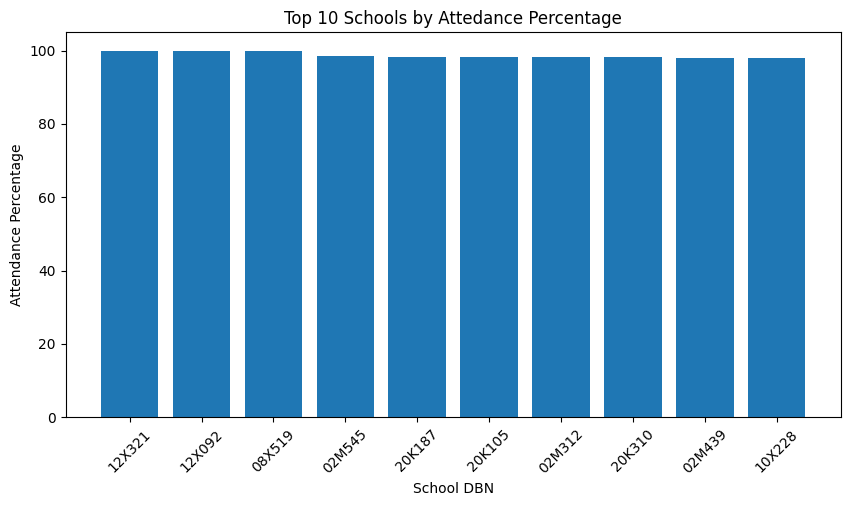

In [ ]:
import matplotlib.pyplot as plt
top_10=school_attendance.sort_values(by='Attendance_Percentage',ascending=False).head(10)
plt.figure(figsize=(10,5))
plt.bar(top_10['School DBN'],
top_10['Attendance_Percentage'])
plt.xlabel('School DBN')
plt.ylabel('Attendance Percentage')
plt.title('Top 10 Schools by Attedance Percentage')
plt.xticks(rotation=45)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

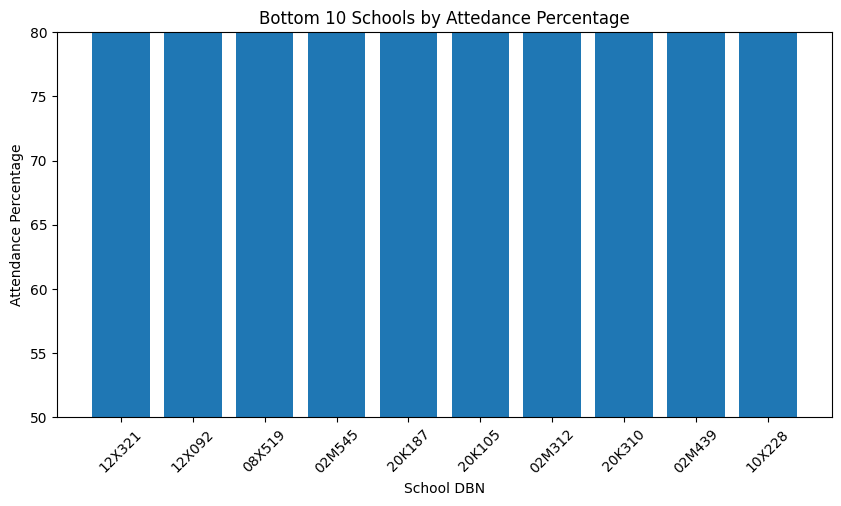

In [ ]:
import matplotlib.pyplot as plt
top_10=school_attendance.sort_values(by='Attendance_Percentage',ascending=False).head(10)
plt.figure(figsize=(10,5))
plt.bar(top_10['School DBN'],
top_10['Attendance_Percentage'])
plt.ylim(50,80)
plt.xlabel('School DBN')
plt.ylabel('Attendance Percentage')
plt.title('Bottom 10 Schools by Attedance Percentage')
plt.xticks(rotation=45)
plt.show